[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train RF-DETR Object Detection on a Custom Dataset

---

[![hf space](https://img.shields.io/badge/%F0%9F%A4%97%20Hugging%20Face-Spaces-blue)](https://huggingface.co/spaces/SkalskiP/RF-DETR)
[![colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/how-to-finetune-rf-detr-on-detection-dataset.ipynb)
[![roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/rf-detr)
[![code](https://badges.aleen42.com/src/github.svg)](https://github.com/roboflow/rf-detr)

RF-DETR is a real-time, transformer-based object detection model architecture developed by Roboflow and released under the Apache 2.0 license.

![rf-detr-coco-rf100-vl-8](https://media.roboflow.com/rfdetr/pareto.png)

The RF-DETR family of models stands as the quickest and most precise in object detection across all sizes. RF-DETR has achieved over 60 mAP on the Microsoft COCO benchmark, a leading measure of object detection performance. It also sets new records on RF100-VL, a benchmark that shows how well models adapt to real-world problems beyond standard datasets.

The RF-DETR model group includes five sizes: Nano, Small, Medium, Base, and Large. These models offer a range of options for different needs. For example, RF-DETR-Nano is 11 mAP higher than YOLO11-n (on mAP50:95) and runs 0.17 ms faster. Likewise, RF-DETR-Small is 1.8 mAP better than YOLO11-x (the biggest YOLO11 model) and speeds things up by a good 7.77 ms. This wide range of models makes RF-DETR a great choice for many real-world uses, from small devices that need to be super fast to bigger jobs that demand top precision.

RF-DETR is small enough to run on edge devices, making it perfect for deployments that need both high accuracy and real-time performance. You can easily get started with any of the RF-DETR models, as they're ready for training in the cloud with Roboflow or through the free RF-DETR Python package.

## Environment setup

### Configure API Key

To fine-tune RF-DETR, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy` to copy your private API key.
- In Colab, go to the left pane and click on `Secrets` (🔑).
    - Store your Roboflow API Key under the name `ROBOFLOW_API_KEY`.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Make a checkpoints directory
import os
output_dir = "/content/drive/MyDrive/checkpoints"
os.makedirs(output_dir, exist_ok=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from google.colab import userdata

os.environ["ROBOFLOW_API_KEY"] = userdata.get("ROBOFLOW_API_KEY")

### Check GPU availability

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `T4 GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Sat Sep 13 18:38:24 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-80GB          Off |   00000000:00:05.0 Off |                    0 |
| N/A   34C    P0             53W /  400W |       0MiB /  81920MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

### Install dependencies

Installs RF-DETR version 1.2.1 or higher (which includes the new Nano, Small, and Medium checkpoints), along with Supervision for benchmarking and Roboflow for pulling datasets and uploading models to the Roboflow platform.

In [ ]:
!pip install -q rfdetr==1.2.1 supervision==0.26.1 roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 kB 25.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 113.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.8/372.8 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Download example data

Downloads example images for testing. You can use these or replace them with your own images.

In [ ]:
!wget -q https://media.roboflow.com/notebooks/examples/dog-2.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-3.jpeg

## Inference with Pre-trained COCO Model

Runs inference on an example image using a pretrained RF-DETR Medium model (trained on COCO). To use a different model size, simply replace `RFDETRMedium` with `RFDETRNano`, `RFDETRSmall`, `RFDETRBase` or `RFDETRLarge` as needed.

In [ ]:
import numpy as np
import supervision as sv

from PIL import Image

from rfdetr import RFDETRMedium
from rfdetr.util.coco_classes import COCO_CLASSES

image = Image.open("dog-2.jpeg")

model = RFDETRMedium(resolution=640)
model.optimize_for_inference()

detections = model.predict(image, threshold=0.5)

color = sv.ColorPalette.from_hex([
    "#ffff00", "#ff9b00", "#ff8080", "#ff66b2", "#ff66ff", "#b266ff",
    "#9999ff", "#3399ff", "#66ffff", "#33ff99", "#66ff66", "#99ff00"
])
text_scale = sv.calculate_optimal_text_scale(resolution_wh=image.size)
thickness = sv.calculate_optimal_line_thickness(resolution_wh=image.size)

bbox_annotator = sv.BoxAnnotator(color=color, thickness=thickness)
label_annotator = sv.LabelAnnotator(
    color=color,
    text_color=sv.Color.BLACK,
    text_scale=text_scale,
    smart_position=True
)

labels = [
    f"{COCO_CLASSES[class_id]} {confidence:.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]

annotated_image = image.copy()
annotated_image = bbox_annotator.annotate(annotated_image, detections)
annotated_image = label_annotator.annotate(annotated_image, detections, labels)
annotated_image.thumbnail((800, 800))
annotated_image

## Download Dataset from Roboflow Universe

RF-DETR expects the dataset to be in COCO format. Divide your dataset into three subdirectories: `train`, `valid`, and `test`. Each subdirectory should contain its own `_annotations.coco.json` file that holds the annotations for that particular split, along with the corresponding image files. Below is an example of the directory structure:

```
dataset/
├── train/
│   ├── _annotations.coco.json
│   ├── image1.jpg
│   ├── image2.jpg
│   └── ... (other image files)
├── valid/
│   ├── _annotations.coco.json
│   ├── image1.jpg
│   ├── image2.jpg
│   └── ... (other image files)
└── test/
    ├── _annotations.coco.json
    ├── image1.jpg
    ├── image2.jpg
    └── ... (other image files)
```

[Roboflow](https://roboflow.com/annotate) allows you to create object detection datasets from scratch or convert existing datasets from formats like YOLO, and then export them in COCO JSON format for training. You can also explore [Roboflow Universe](https://universe.roboflow.com/) to find pre-labeled datasets for a range of use cases.

In [ ]:
from roboflow import download_dataset

dataset = download_dataset("https://app.roboflow.com/containerdamage-hmenv/container-damage-ithvn/1", "coco")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to container-damage-1 in coco:: 100%|██████████| 9660/9660 [00:01<00:00, 5985.40it/s]


## Train RF-DETR on custom dataset

### Choose the right `batch_size`

Different GPUs have different amounts of VRAM (video memory), which limits how much data they can handle at once during training. To make training work well on any machine, you can adjust two settings: `batch_size` and `grad_accum_steps`. These control how many samples are processed at a time. The key is to keep their product equal to 16 — that’s our recommended total batch size. For example, on powerful GPUs like the A100, set `batch_size=16` and `grad_accum_steps=1`. On smaller GPUs like the T4, use `batch_size=4` and `grad_accum_steps=4`. We use a method called gradient accumulation, which lets the model simulate training with a larger batch size by gradually collecting updates before adjusting the weights.

In [ ]:
#model training with 20 epochs
from pathlib import Path
from rfdetr import RFDETRSmall
from google.colab import files

DATA = dataset.location
OUT  = Path("/content/drive/MyDrive/checkpoints")
OUT.mkdir(parents=True, exist_ok=True)

model = RFDETRSmall()

# Train with checkpoints every 5 epochs for safer saving
model.train(
    dataset_dir=DATA,
    epochs=20,                 # total epochs
    batch_size=16,
    grad_accum_steps=1,
    output_dir=str(OUT),
    checkpoint_interval=5      # saves every 10 epochs:10
)
# Download all saved checkpoint files
for ckpt in OUT.glob("checkpoint_*.pth"):
    files.download(str(ckpt))

rf-detr-small.pth: 100%|██████████| 368M/368M [00:10<00:00, 35.8MiB/s]


Using a different number of positional encodings than DINOv2, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Using patch size 16 instead of 14, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Loading pretrain weights


reinitializing your detection head with 4 classes.


TensorBoard logging initialized. To monitor logs, use 'tensorboard --logdir /content/drive/MyDrive/checkpoints' and open http://localhost:6006/ in browser.
Not using distributed mode
git:
  sha: N/A, status: clean, branch: N/A

Namespace(num_classes=4, grad_accum_steps=1, amp=True, lr=0.0001, lr_encoder=0.00015, batch_size=16, weight_decay=0.0001, epochs=20, lr_drop=100, clip_max_norm=0.1, lr_vit_layer_decay=0.8, lr_component_decay=0.7, do_benchmark=False, dropout=0, drop_path=0.0, drop_mode='standard', drop_schedule='constant', cutoff_epoch=0, pretrained_encoder=None, pretrain_weights='rf-detr-small.pth', pretrain_exclude_keys=None, pretrain_keys_modify_to_load=None, pretrained_distiller=None, encoder='dinov2_windowed_small', vit_encoder_num_layers=12, window_block_indexes=None, position_embedding='sine', out_feature_indexes=[3, 6, 9, 12], freeze_encoder=False, layer_norm=True, rms_norm=False, backbone_lora=False, force_no_pretrain=False, dec_layers=3, dim_feedforward=2048, hidden_dim

Epoch: [0]  [  0/421]  eta: 0:39:13  lr: 0.000100  class_error: 79.16  loss: 13.0126 (13.0126)  loss_ce: 0.7701 (0.7701)  loss_bbox: 0.9711 (0.9711)  loss_giou: 1.2414 (1.2414)  loss_ce_0: 0.6784 (0.6784)  loss_bbox_0: 1.3170 (1.3170)  loss_giou_0: 1.4222 (1.4222)  loss_ce_1: 0.7394 (0.7394)  loss_bbox_1: 0.9943 (0.9943)  loss_giou_1: 1.2902 (1.2902)  loss_ce_enc: 0.6416 (0.6416)  loss_bbox_enc: 1.4253 (1.4253)  loss_giou_enc: 1.5216 (1.5216)  loss_ce_unscaled: 0.7701 (0.7701)  class_error_unscaled: 79.1563 (79.1563)  loss_bbox_unscaled: 0.1942 (0.1942)  loss_giou_unscaled: 0.6207 (0.6207)  cardinality_error_unscaled: 3760.0000 (3760.0000)  loss_ce_0_unscaled: 0.6784 (0.6784)  loss_bbox_0_unscaled: 0.2634 (0.2634)  loss_giou_0_unscaled: 0.7111 (0.7111)  cardinality_error_0_unscaled: 3630.3750 (3630.3750)  loss_ce_1_unscaled: 0.7394 (0.7394)  loss_bbox_1_unscaled: 0.1989 (0.1989)  loss_giou_1_unscaled: 0.6451 (0.6451)  cardinality_error_1_unscaled: 3759.8125 (3759.8125)  loss_ce_enc_uns

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
checkpoint_path = "/content/drive/MyDrive/checkpoints/checkpoint0019.pth" #resuming from the last saved 20 epochs
output_dir = "/content/drive/MyDrive/checkpoints"

In [ ]:
#model training 2
from rfdetr import RFDETRSmall
model = RFDETRSmall()

model.train(
    dataset_dir=dataset.location,   # your dataset path
    epochs=30,                       # number of remaining epochs
    batch_size=16,
    grad_accum_steps=1,
    output_dir=output_dir,
    checkpoint_interval=5,
    resume=checkpoint_path          # <-- resume training from checkpoint
)

Using a different number of positional encodings than DINOv2, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Using patch size 16 instead of 14, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Loading pretrain weights


reinitializing your detection head with 4 classes.


TensorBoard logging initialized. To monitor logs, use 'tensorboard --logdir /content/drive/MyDrive/checkpoints' and open http://localhost:6006/ in browser.
Not using distributed mode
git:
  sha: N/A, status: clean, branch: N/A

Namespace(num_classes=4, grad_accum_steps=1, amp=True, lr=0.0001, lr_encoder=0.00015, batch_size=16, weight_decay=0.0001, epochs=30, lr_drop=100, clip_max_norm=0.1, lr_vit_layer_decay=0.8, lr_component_decay=0.7, do_benchmark=False, dropout=0, drop_path=0.0, drop_mode='standard', drop_schedule='constant', cutoff_epoch=0, pretrained_encoder=None, pretrain_weights='rf-detr-small.pth', pretrain_exclude_keys=None, pretrain_keys_modify_to_load=None, pretrained_distiller=None, encoder='dinov2_windowed_small', vit_encoder_num_layers=12, window_block_indexes=None, position_embedding='sine', out_feature_indexes=[3, 6, 9, 12], freeze_encoder=False, layer_norm=True, rms_norm=False, backbone_lora=False, force_no_pretrain=False, dec_layers=3, dim_feedforward=2048, hidden_dim

Epoch: [20]  [  0/421]  eta: 0:09:24  lr: 0.000100  class_error: 0.74  loss: 4.0039 (4.0039)  loss_ce: 0.4866 (0.4866)  loss_bbox: 0.1770 (0.1770)  loss_giou: 0.2781 (0.2781)  loss_ce_0: 0.5448 (0.5448)  loss_bbox_0: 0.1622 (0.1622)  loss_giou_0: 0.2786 (0.2786)  loss_ce_1: 0.5022 (0.5022)  loss_bbox_1: 0.1710 (0.1710)  loss_giou_1: 0.2743 (0.2743)  loss_ce_enc: 0.6000 (0.6000)  loss_bbox_enc: 0.2143 (0.2143)  loss_giou_enc: 0.3148 (0.3148)  loss_ce_unscaled: 0.4866 (0.4866)  class_error_unscaled: 0.7444 (0.7444)  loss_bbox_unscaled: 0.0354 (0.0354)  loss_giou_unscaled: 0.1391 (0.1391)  cardinality_error_unscaled: 2980.8750 (2980.8750)  loss_ce_0_unscaled: 0.5448 (0.5448)  loss_bbox_0_unscaled: 0.0324 (0.0324)  loss_giou_0_unscaled: 0.1393 (0.1393)  cardinality_error_0_unscaled: 3125.0625 (3125.0625)  loss_ce_1_unscaled: 0.5022 (0.5022)  loss_bbox_1_unscaled: 0.0342 (0.0342)  loss_giou_1_unscaled: 0.1372 (0.1372)  cardinality_error_1_unscaled: 3051.7500 (3051.7500)  loss_ce_enc_unscale

In [ ]:
checkpoint_path = "/content/drive/MyDrive/checkpoints/checkpoint0029.pth" #resuming from the last saved 30 epochs
output_dir = "/content/drive/MyDrive/checkpoints"

In [ ]:
#model training 2
from rfdetr import RFDETRSmall
model = RFDETRSmall()

model.train(
    dataset_dir=dataset.location,   # your dataset path
    epochs=40,                       # number of remaining epochs
    batch_size=16,
    grad_accum_steps=1,
    output_dir=output_dir,
    checkpoint_interval=5,
    resume=checkpoint_path          # <-- resume training from checkpoint
)

Using a different number of positional encodings than DINOv2, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Using patch size 16 instead of 14, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Loading pretrain weights


reinitializing your detection head with 4 classes.


TensorBoard logging initialized. To monitor logs, use 'tensorboard --logdir /content/drive/MyDrive/checkpoints' and open http://localhost:6006/ in browser.
Not using distributed mode
git:
  sha: N/A, status: clean, branch: N/A

Namespace(num_classes=4, grad_accum_steps=1, amp=True, lr=0.0001, lr_encoder=0.00015, batch_size=16, weight_decay=0.0001, epochs=40, lr_drop=100, clip_max_norm=0.1, lr_vit_layer_decay=0.8, lr_component_decay=0.7, do_benchmark=False, dropout=0, drop_path=0.0, drop_mode='standard', drop_schedule='constant', cutoff_epoch=0, pretrained_encoder=None, pretrain_weights='rf-detr-small.pth', pretrain_exclude_keys=None, pretrain_keys_modify_to_load=None, pretrained_distiller=None, encoder='dinov2_windowed_small', vit_encoder_num_layers=12, window_block_indexes=None, position_embedding='sine', out_feature_indexes=[3, 6, 9, 12], freeze_encoder=False, layer_norm=True, rms_norm=False, backbone_lora=False, force_no_pretrain=False, dec_layers=3, dim_feedforward=2048, hidden_dim

Epoch: [30]  [  0/421]  eta: 0:09:59  lr: 0.000100  class_error: 0.00  loss: 3.7406 (3.7406)  loss_ce: 0.4678 (0.4678)  loss_bbox: 0.1263 (0.1263)  loss_giou: 0.2338 (0.2338)  loss_ce_0: 0.5557 (0.5557)  loss_bbox_0: 0.1311 (0.1311)  loss_giou_0: 0.2447 (0.2447)  loss_ce_1: 0.4841 (0.4841)  loss_bbox_1: 0.1304 (0.1304)  loss_giou_1: 0.2342 (0.2342)  loss_ce_enc: 0.5778 (0.5778)  loss_bbox_enc: 0.2248 (0.2248)  loss_giou_enc: 0.3300 (0.3300)  loss_ce_unscaled: 0.4678 (0.4678)  class_error_unscaled: 0.0000 (0.0000)  loss_bbox_unscaled: 0.0253 (0.0253)  loss_giou_unscaled: 0.1169 (0.1169)  cardinality_error_unscaled: 3237.3750 (3237.3750)  loss_ce_0_unscaled: 0.5557 (0.5557)  loss_bbox_0_unscaled: 0.0262 (0.0262)  loss_giou_0_unscaled: 0.1223 (0.1223)  cardinality_error_0_unscaled: 3060.2500 (3060.2500)  loss_ce_1_unscaled: 0.4841 (0.4841)  loss_bbox_1_unscaled: 0.0261 (0.0261)  loss_giou_1_unscaled: 0.1171 (0.1171)  cardinality_error_1_unscaled: 3211.1250 (3211.1250)  loss_ce_enc_unscale

In [ ]:
checkpoint_path = "/content/drive/MyDrive/checkpoints/checkpoint0039.pth" #resuming from the last saved 40 epochs
output_dir = "/content/drive/MyDrive/checkpoints"

In [ ]:
#model training 3
from rfdetr import RFDETRSmall
model = RFDETRSmall()

model.train(
    dataset_dir=dataset.location,   # your dataset path
    epochs=45,                       # number of remaining epochs
    batch_size=16,
    grad_accum_steps=1,
    output_dir=output_dir,
    checkpoint_interval=5,
    resume=checkpoint_path          # <-- resume training from checkpoint
)

Using a different number of positional encodings than DINOv2, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Using patch size 16 instead of 14, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Loading pretrain weights


reinitializing your detection head with 4 classes.


TensorBoard logging initialized. To monitor logs, use 'tensorboard --logdir /content/drive/MyDrive/checkpoints' and open http://localhost:6006/ in browser.
Not using distributed mode
git:
  sha: N/A, status: clean, branch: N/A

Namespace(num_classes=4, grad_accum_steps=1, amp=True, lr=0.0001, lr_encoder=0.00015, batch_size=16, weight_decay=0.0001, epochs=45, lr_drop=100, clip_max_norm=0.1, lr_vit_layer_decay=0.8, lr_component_decay=0.7, do_benchmark=False, dropout=0, drop_path=0.0, drop_mode='standard', drop_schedule='constant', cutoff_epoch=0, pretrained_encoder=None, pretrain_weights='rf-detr-small.pth', pretrain_exclude_keys=None, pretrain_keys_modify_to_load=None, pretrained_distiller=None, encoder='dinov2_windowed_small', vit_encoder_num_layers=12, window_block_indexes=None, position_embedding='sine', out_feature_indexes=[3, 6, 9, 12], freeze_encoder=False, layer_norm=True, rms_norm=False, backbone_lora=False, force_no_pretrain=False, dec_layers=3, dim_feedforward=2048, hidden_dim

Epoch: [40]  [  0/421]  eta: 0:10:13  lr: 0.000100  class_error: 0.00  loss: 3.5021 (3.5021)  loss_ce: 0.3728 (0.3728)  loss_bbox: 0.1418 (0.1418)  loss_giou: 0.2370 (0.2370)  loss_ce_0: 0.4627 (0.4627)  loss_bbox_0: 0.1567 (0.1567)  loss_giou_0: 0.2493 (0.2493)  loss_ce_1: 0.3972 (0.3972)  loss_bbox_1: 0.1428 (0.1428)  loss_giou_1: 0.2388 (0.2388)  loss_ce_enc: 0.5106 (0.5106)  loss_bbox_enc: 0.2464 (0.2464)  loss_giou_enc: 0.3461 (0.3461)  loss_ce_unscaled: 0.3728 (0.3728)  class_error_unscaled: 0.0000 (0.0000)  loss_bbox_unscaled: 0.0284 (0.0284)  loss_giou_unscaled: 0.1185 (0.1185)  cardinality_error_unscaled: 3215.1250 (3215.1250)  loss_ce_0_unscaled: 0.4627 (0.4627)  loss_bbox_0_unscaled: 0.0313 (0.0313)  loss_giou_0_unscaled: 0.1247 (0.1247)  cardinality_error_0_unscaled: 3095.8750 (3095.8750)  loss_ce_1_unscaled: 0.3972 (0.3972)  loss_bbox_1_unscaled: 0.0286 (0.0286)  loss_giou_1_unscaled: 0.1194 (0.1194)  cardinality_error_1_unscaled: 3156.8125 (3156.8125)  loss_ce_enc_unscale

In [ ]:
checkpoint_path = "/content/drive/MyDrive/checkpoints/checkpoint0044.pth" #resuming from the last saved 45 epochs
output_dir = "/content/drive/MyDrive/checkpoints"

In [ ]:
#model training 4
from rfdetr import RFDETRSmall
model = RFDETRSmall()

model.train(
    dataset_dir=dataset.location,   # your dataset path
    epochs=50,                       # number of remaining epochs
    batch_size=16,
    grad_accum_steps=1,
    output_dir=output_dir,
    checkpoint_interval=5,
    resume=checkpoint_path          # <-- resume training from checkpoint
)

rf-detr-small.pth: 100%|██████████| 368M/368M [00:19<00:00, 19.7MiB/s]


Using a different number of positional encodings than DINOv2, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Using patch size 16 instead of 14, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Loading pretrain weights


reinitializing your detection head with 4 classes.


TensorBoard logging initialized. To monitor logs, use 'tensorboard --logdir /content/drive/MyDrive/checkpoints' and open http://localhost:6006/ in browser.
Not using distributed mode
git:
  sha: N/A, status: clean, branch: N/A

Namespace(num_classes=4, grad_accum_steps=1, amp=True, lr=0.0001, lr_encoder=0.00015, batch_size=16, weight_decay=0.0001, epochs=50, lr_drop=100, clip_max_norm=0.1, lr_vit_layer_decay=0.8, lr_component_decay=0.7, do_benchmark=False, dropout=0, drop_path=0.0, drop_mode='standard', drop_schedule='constant', cutoff_epoch=0, pretrained_encoder=None, pretrain_weights='rf-detr-small.pth', pretrain_exclude_keys=None, pretrain_keys_modify_to_load=None, pretrained_distiller=None, encoder='dinov2_windowed_small', vit_encoder_num_layers=12, window_block_indexes=None, position_embedding='sine', out_feature_indexes=[3, 6, 9, 12], freeze_encoder=False, layer_norm=True, rms_norm=False, backbone_lora=False, force_no_pretrain=False, dec_layers=3, dim_feedforward=2048, hidden_dim

Epoch: [45]  [  0/421]  eta: 0:37:40  lr: 0.000100  class_error: 0.00  loss: 3.4807 (3.4807)  loss_ce: 0.3863 (0.3863)  loss_bbox: 0.1353 (0.1353)  loss_giou: 0.2428 (0.2428)  loss_ce_0: 0.4464 (0.4464)  loss_bbox_0: 0.1375 (0.1375)  loss_giou_0: 0.2412 (0.2412)  loss_ce_1: 0.3976 (0.3976)  loss_bbox_1: 0.1308 (0.1308)  loss_giou_1: 0.2398 (0.2398)  loss_ce_enc: 0.5395 (0.5395)  loss_bbox_enc: 0.2636 (0.2636)  loss_giou_enc: 0.3200 (0.3200)  loss_ce_unscaled: 0.3863 (0.3863)  class_error_unscaled: 0.0000 (0.0000)  loss_bbox_unscaled: 0.0271 (0.0271)  loss_giou_unscaled: 0.1214 (0.1214)  cardinality_error_unscaled: 3345.7500 (3345.7500)  loss_ce_0_unscaled: 0.4464 (0.4464)  loss_bbox_0_unscaled: 0.0275 (0.0275)  loss_giou_0_unscaled: 0.1206 (0.1206)  cardinality_error_0_unscaled: 3217.8750 (3217.8750)  loss_ce_1_unscaled: 0.3976 (0.3976)  loss_bbox_1_unscaled: 0.0262 (0.0262)  loss_giou_1_unscaled: 0.1199 (0.1199)  cardinality_error_1_unscaled: 3393.2500 (3393.2500)  loss_ce_enc_unscale

In [ ]:
import json, os #after 30 epochs

results_path = os.path.join(output_dir, "results.json")
with open(results_path) as f:
    results = json.load(f)

print("Current mAP:", results['map'])
print("Precision:", results['precision'])
print("Recall:", results['recall'])
print("Class mapping:", results['class_map'])

Current mAP: 0.921908741005056
Precision: 0.8991416572398006
Recall: 0.88
Class mapping: {'valid': [{'class': 'dent', 'map@50:95': 0.6354780781197961, 'map@50': 0.9394152675011004, 'precision': 0.9404591104734576, 'recall': 0.88}, {'class': 'hole', 'map@50:95': 0.5785044750424153, 'map@50': 0.9153132346138676, 'precision': 0.8673469387755102, 'recall': 0.88}, {'class': 'rust', 'map@50:95': 0.5652265624233286, 'map@50': 0.9109977209001997, 'precision': 0.8896189224704336, 'recall': 0.88}, {'class': 'all', 'map@50:95': 0.59306970519518, 'map@50': 0.921908741005056, 'precision': 0.8991416572398006, 'recall': 0.88}], 'test': [{'class': 'dent', 'map@50:95': 0.639899945296519, 'map@50': 0.9353647835617812, 'precision': 0.9710806697108066, 'recall': 0.84}, {'class': 'hole', 'map@50:95': 0.5603951674075313, 'map@50': 0.8403730066338041, 'precision': 0.8666666666666667, 'recall': 0.84}, {'class': 'rust', 'map@50:95': 0.5783473120913248, 'map@50': 0.9103918712939967, 'precision': 0.9373665480427

In [ ]:
import json, os #after 40 epochs

results_path = os.path.join(output_dir, "results.json")
with open(results_path) as f:
    results = json.load(f)

print("Current mAP:", results['map'])
print("Precision:", results['precision'])
print("Recall:", results['recall'])

Current mAP: 0.9360089549067184
Precision: 0.921635524066058
Recall: 0.89


In [ ]:
import json, os #after 45 epochs

results_path = os.path.join(output_dir, "results.json")
with open(results_path) as f:
    results = json.load(f)

print("Current mAP:", results['map'])
print("Precision:", results['precision'])
print("Recall:", results['recall'])
print("Class mapping:", results['class_map'])


Current mAP: 0.9383545902360412
Precision: 0.9352176644689533
Recall: 0.88
Class mapping: {'valid': [{'class': 'dent', 'map@50:95': 0.6879723835870272, 'map@50': 0.952797921033275, 'precision': 0.9647058823529412, 'recall': 0.88}, {'class': 'hole', 'map@50:95': 0.6250661974959646, 'map@50': 0.9296792224799173, 'precision': 0.8947368421052632, 'recall': 0.88}, {'class': 'rust', 'map@50:95': 0.6138267940624164, 'map@50': 0.9325866271949317, 'precision': 0.9462102689486552, 'recall': 0.88}, {'class': 'all', 'map@50:95': 0.6422884583818028, 'map@50': 0.9383545902360412, 'precision': 0.9352176644689533, 'recall': 0.88}], 'test': [{'class': 'dent', 'map@50:95': 0.678861840459227, 'map@50': 0.9458854834343321, 'precision': 0.9726027397260274, 'recall': 0.84}, {'class': 'hole', 'map@50:95': 0.5728760972823833, 'map@50': 0.8384761740098892, 'precision': 0.8376068376068376, 'recall': 0.84}, {'class': 'rust', 'map@50:95': 0.6250604785481949, 'map@50': 0.9327200535088831, 'precision': 0.9649379108

In [ ]:
import json, os #after 50 epochs

results_path = os.path.join(output_dir, "results.json")
with open(results_path) as f:
    results = json.load(f)

print("Current mAP:", results['map'])
print("Precision:", results['precision'])
print("Recall:", results['recall'])
print("Class mapping:", results['class_map'])

Current mAP: 0.941752234238604
Precision: 0.9268309072654795
Recall: 0.9
Class mapping: {'valid': [{'class': 'dent', 'map@50:95': 0.6957307625987189, 'map@50': 0.960213202736471, 'precision': 0.9580071174377224, 'recall': 0.9}, {'class': 'hole', 'map@50:95': 0.6343053608913538, 'map@50': 0.9289818574143994, 'precision': 0.8923076923076924, 'recall': 0.9}, {'class': 'rust', 'map@50:95': 0.624876005909809, 'map@50': 0.9360616425649416, 'precision': 0.9301779120510238, 'recall': 0.9}, {'class': 'all', 'map@50:95': 0.6516373764666272, 'map@50': 0.941752234238604, 'precision': 0.9268309072654795, 'recall': 0.9}], 'test': [{'class': 'dent', 'map@50:95': 0.6841376900572715, 'map@50': 0.9520367972075295, 'precision': 0.9845916795069337, 'recall': 0.84}, {'class': 'hole', 'map@50:95': 0.5865667417456688, 'map@50': 0.8571460550576805, 'precision': 0.9112149532710281, 'recall': 0.84}, {'class': 'rust', 'map@50:95': 0.6353330665111023, 'map@50': 0.9356116389544508, 'precision': 0.972181551976574, 

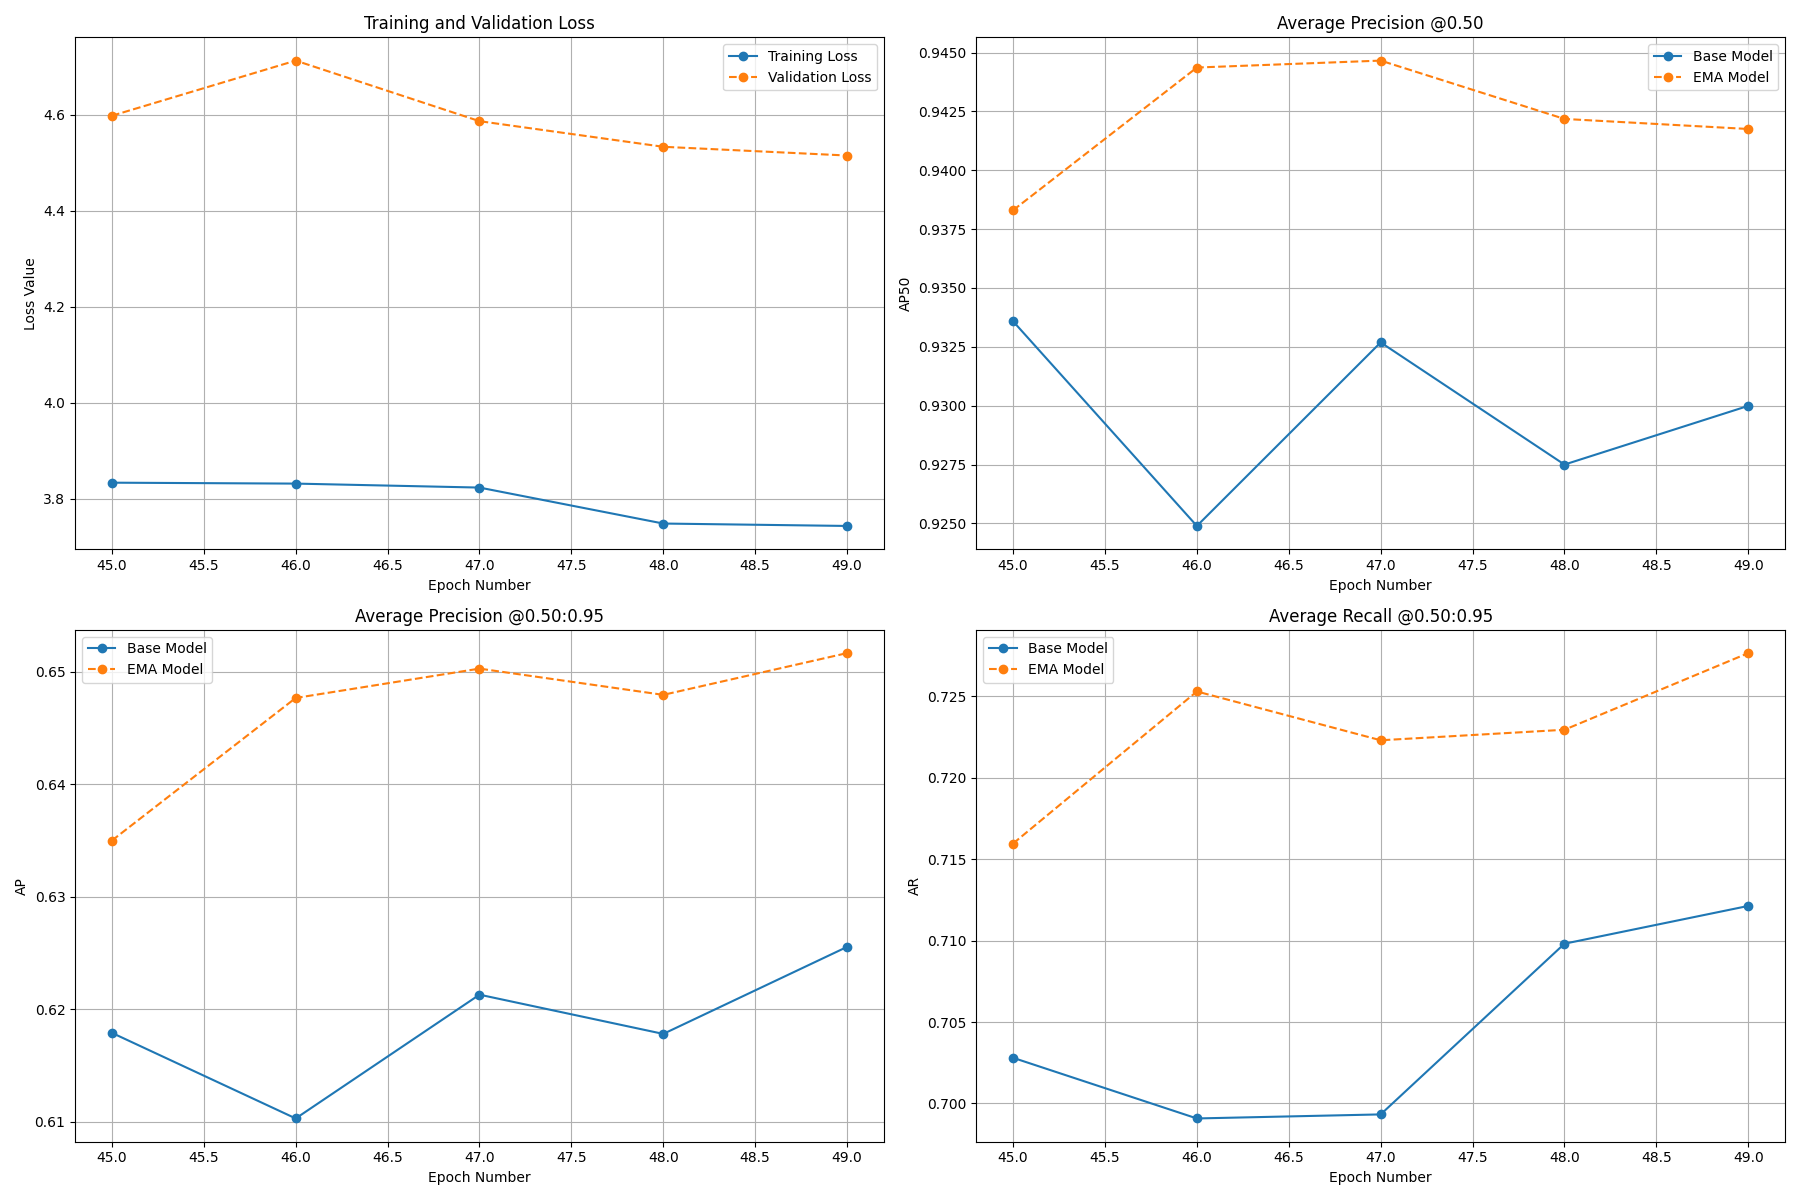

In [ ]:
from PIL import Image #after 50 epochs

Image.open("/content/drive/MyDrive/checkpoints/metrics_plot.png")

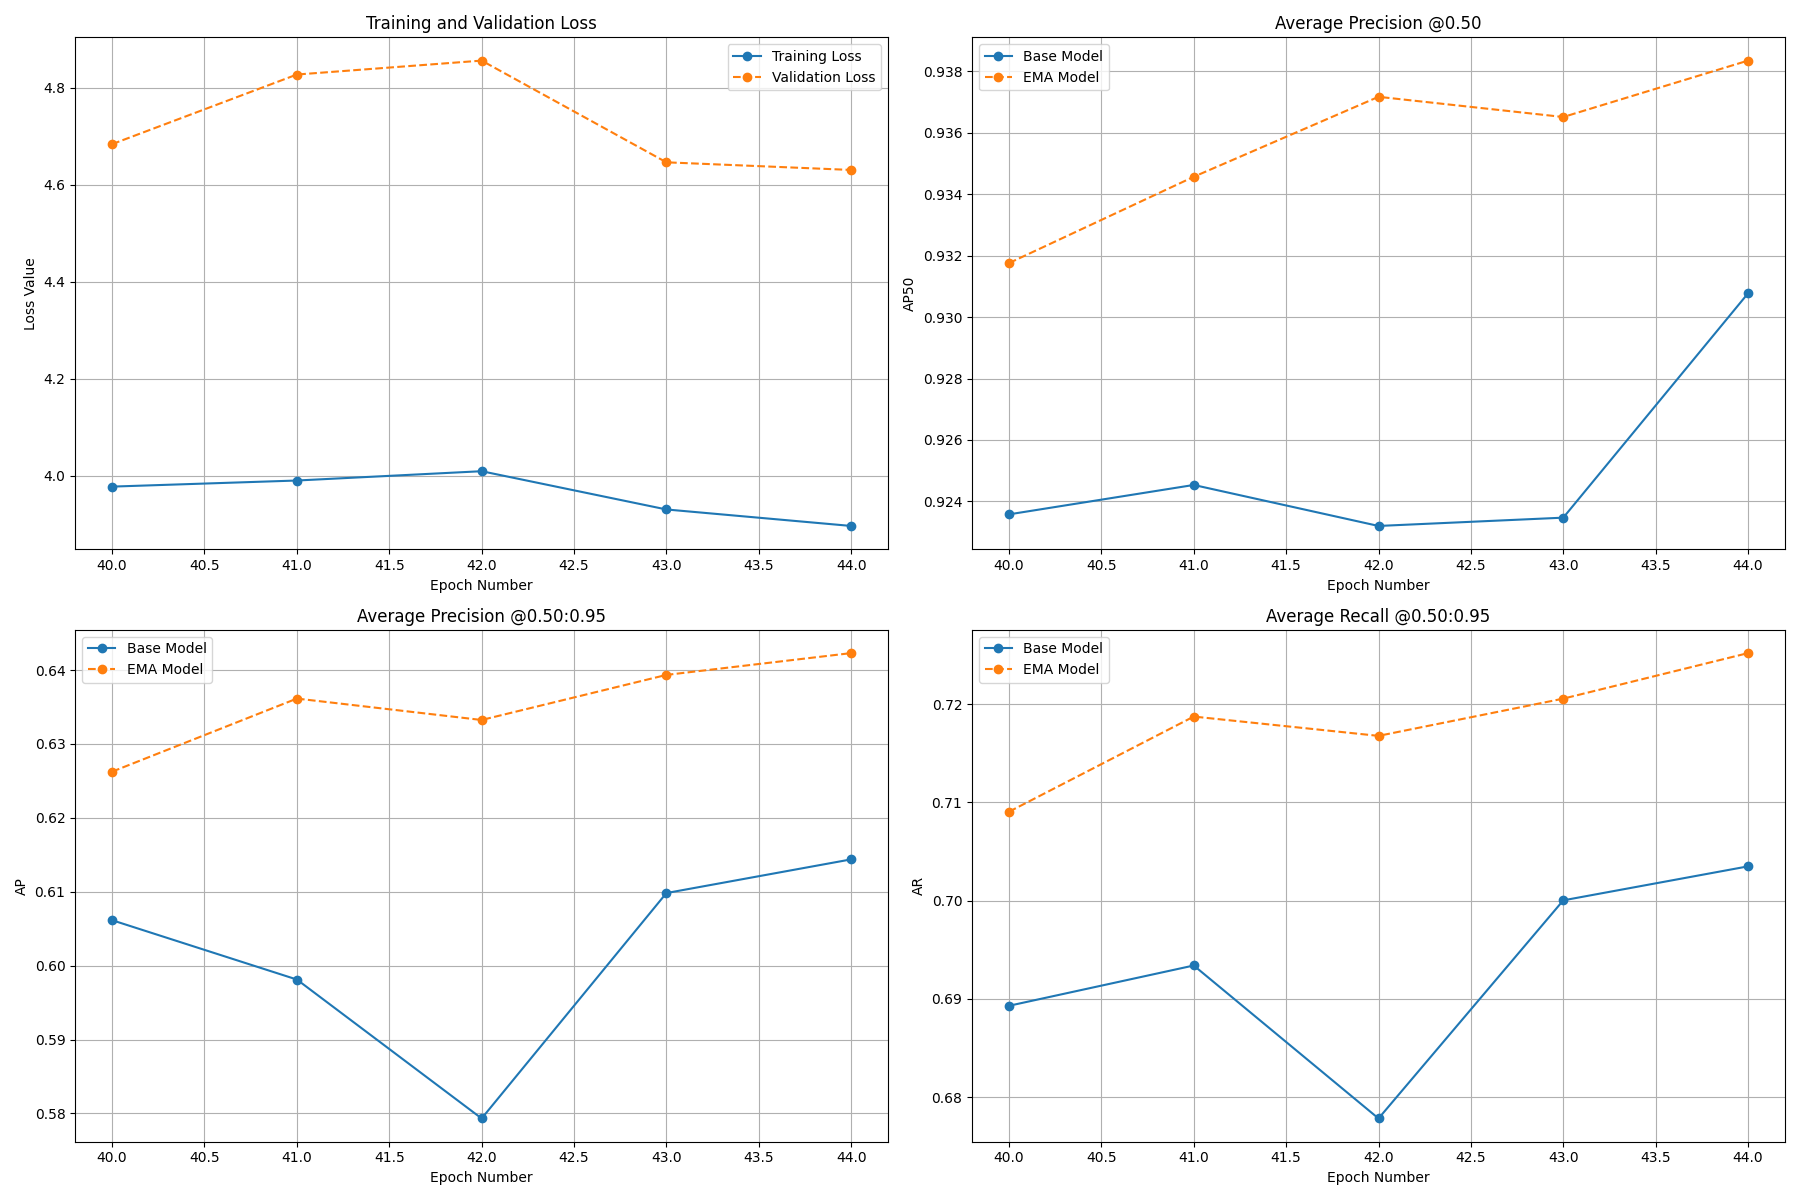

In [ ]:
from PIL import Image #after 45 epochs

Image.open("/content/drive/MyDrive/checkpoints/metrics_plot.png")

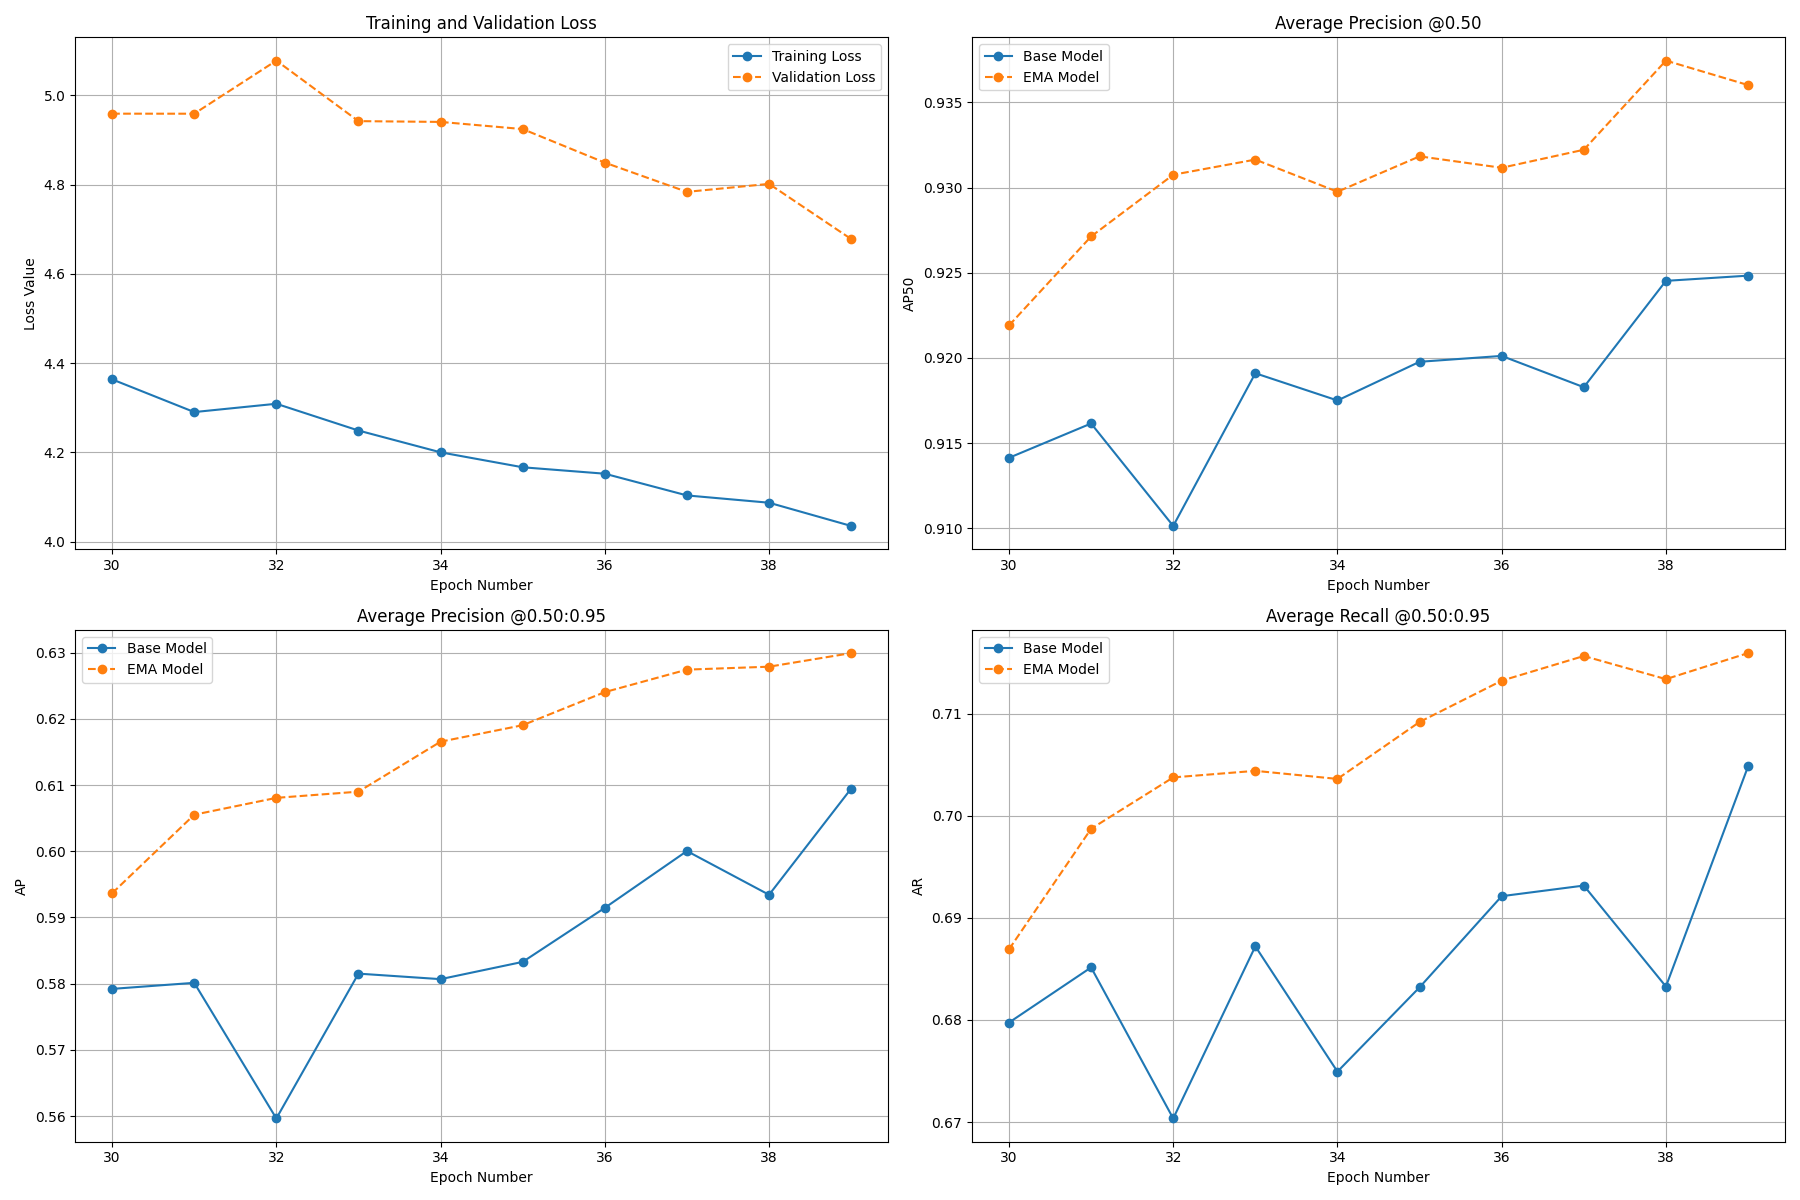

In [ ]:
from PIL import Image #after 40 epochs

Image.open("/content/drive/MyDrive/checkpoints/metrics_plot.png")

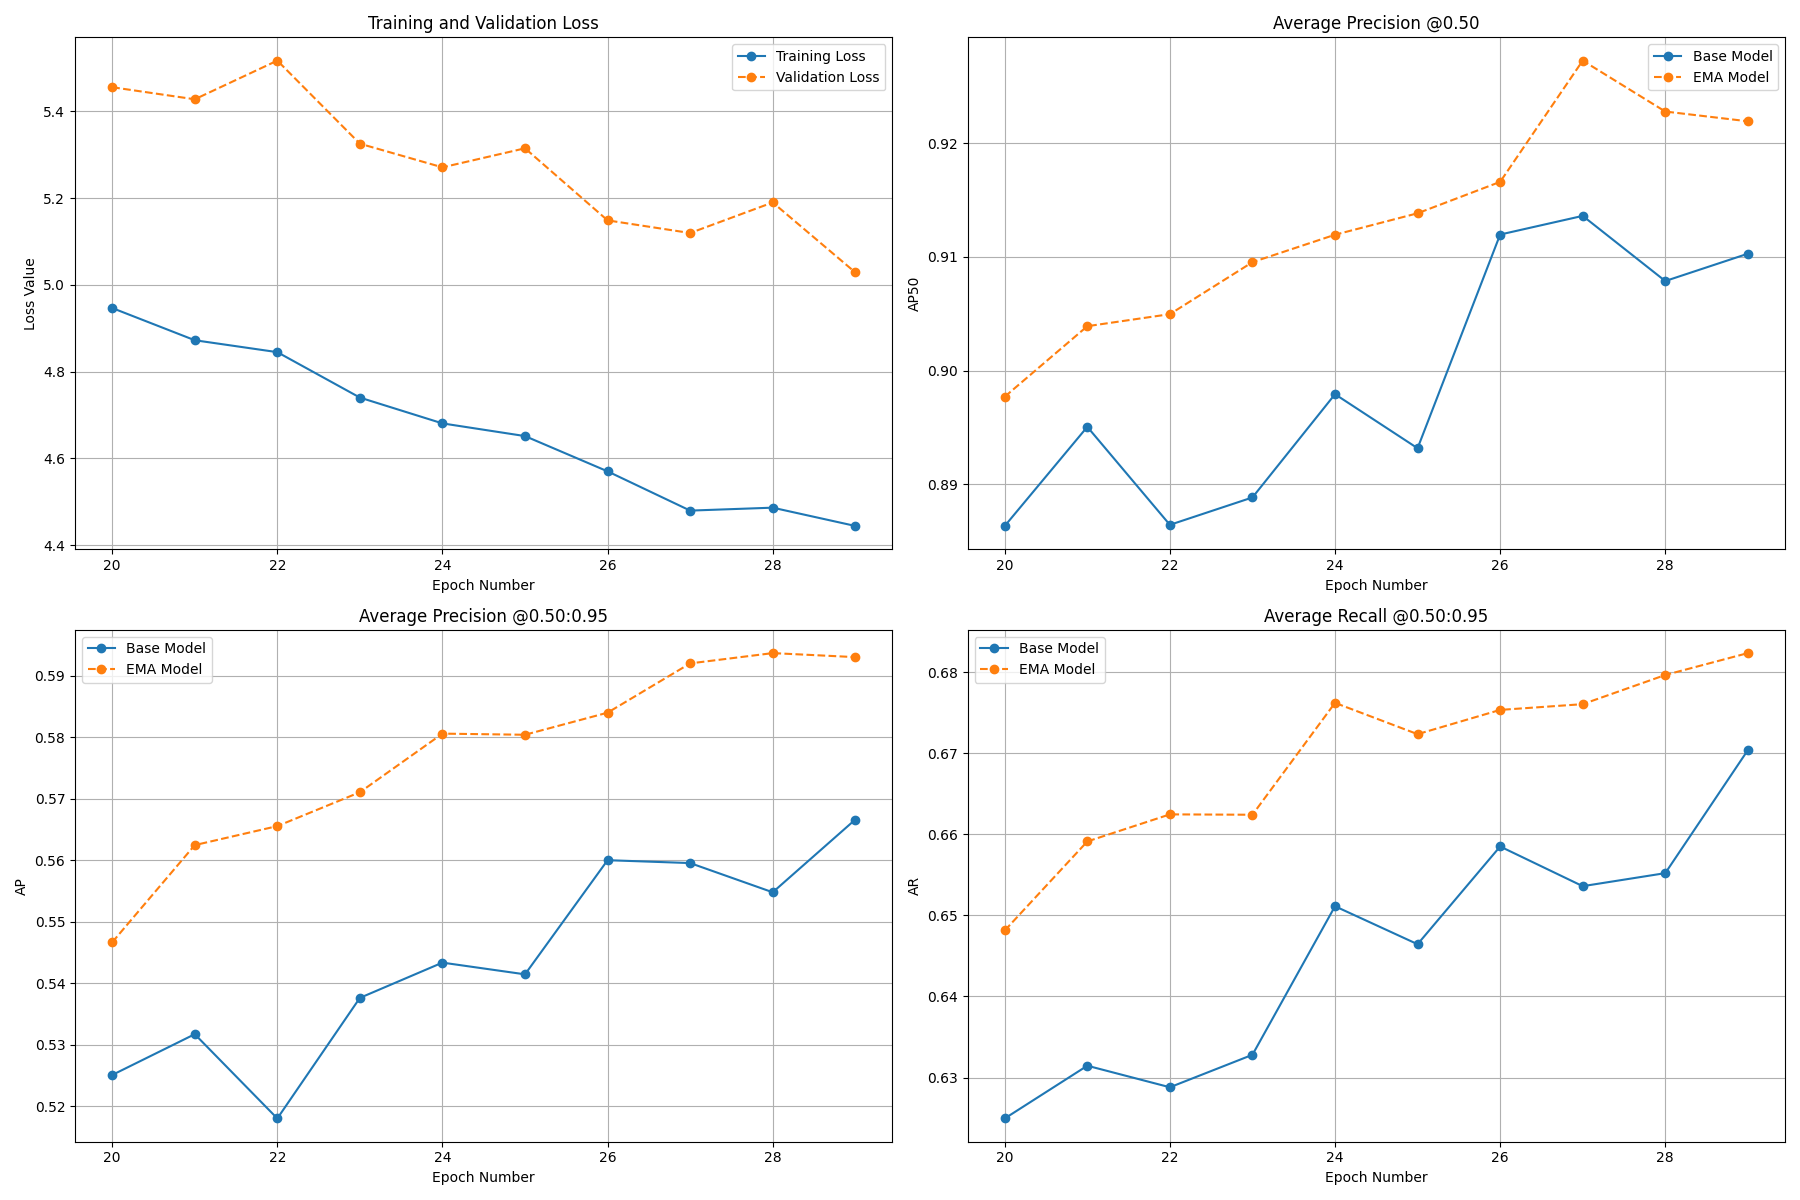

In [ ]:
from PIL import Image #after 30 epochs

Image.open("/content/drive/MyDrive/checkpoints/metrics_plot.png")

   Epoch  Train Loss  Validation Loss  Train Accuracy (%)  \
0      0    9.189888         8.422425           77.637111   
1      1    8.060334         7.874512           92.134502   
2      2    7.664860         7.581092           95.077879   
3      3    7.339939         7.285522           96.097361   
4      4    7.054052         7.107063           97.000154   

   Validation Accuracy (%)  Precision  Recall       mAP  
0                90.313680   0.376953    0.39  0.318556  
1                94.066351   0.521024    0.47  0.469137  
2                95.948903   0.620341    0.50  0.560166  
3                96.595137   0.648001    0.57  0.618466  
4                96.558835   0.675011    0.58  0.637098  


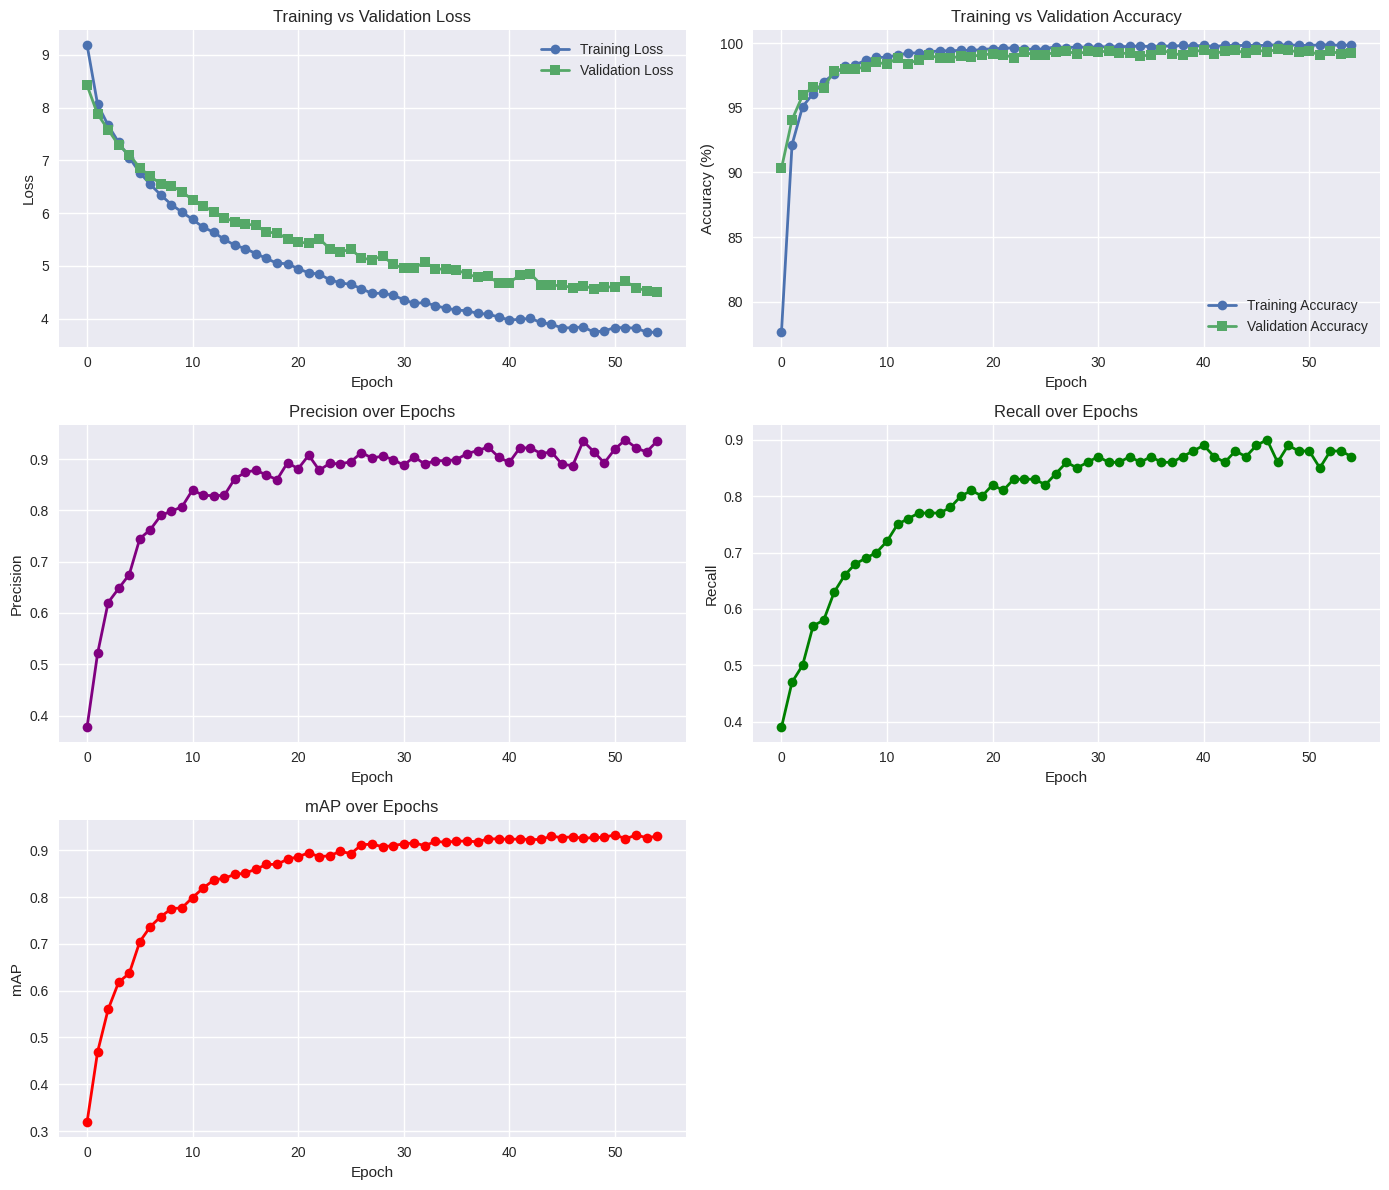

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Optional: use a clean style
plt.style.use("seaborn-v0_8")

# Load CSV
csv_path = '/content/drive/MyDrive/Metrics_Over_epochs.csv'
df = pd.read_csv(csv_path)

print(df.head())

# Create subplots grid
fig, axs = plt.subplots(3, 2, figsize=(14, 12))
axs = axs.ravel()  # flatten 2D to 1D for easy indexing

# 1. Training vs Validation Loss
axs[0].plot(df["Epoch"], df["Train Loss"], label="Training Loss", linewidth=2, marker="o")
axs[0].plot(df["Epoch"], df["Validation Loss"], label="Validation Loss", linewidth=2, marker="s")
axs[0].set_title("Training vs Validation Loss")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()
axs[0].grid(True)

# 2. Training vs Validation Accuracy
axs[1].plot(df["Epoch"], df["Train Accuracy (%)"], label="Training Accuracy", linewidth=2, marker="o")
axs[1].plot(df["Epoch"], df["Validation Accuracy (%)"], label="Validation Accuracy", linewidth=2, marker="s")
axs[1].set_title("Training vs Validation Accuracy")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Accuracy (%)")
axs[1].legend()
axs[1].grid(True)

# 3. Precision
axs[2].plot(df["Epoch"], df["Precision"], marker="o", color="purple", linewidth=2)
axs[2].set_title("Precision over Epochs")
axs[2].set_xlabel("Epoch")
axs[2].set_ylabel("Precision")
axs[2].grid(True)

# 4. Recall
axs[3].plot(df["Epoch"], df["Recall"], marker="o", color="green", linewidth=2)
axs[3].set_title("Recall over Epochs")
axs[3].set_xlabel("Epoch")
axs[3].set_ylabel("Recall")
axs[3].grid(True)

# 5. mAP
axs[4].plot(df["Epoch"], df["mAP"], marker="o", color="red", linewidth=2)
axs[4].set_title("mAP over Epochs")
axs[4].set_xlabel("Epoch")
axs[4].set_ylabel("mAP")
axs[4].grid(True)

# Remove empty subplot (bottom right corner)
fig.delaxes(axs[5])

# Adjust layout
plt.tight_layout()
plt.show()


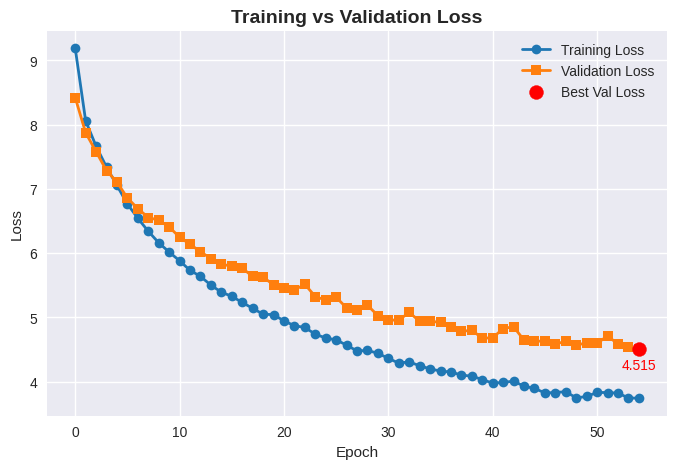

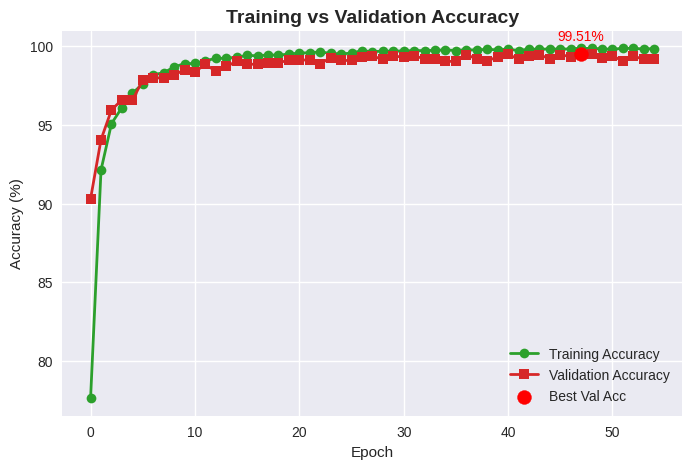

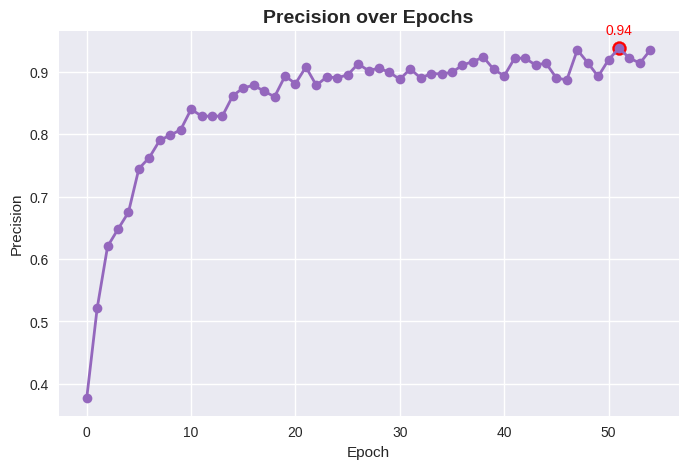

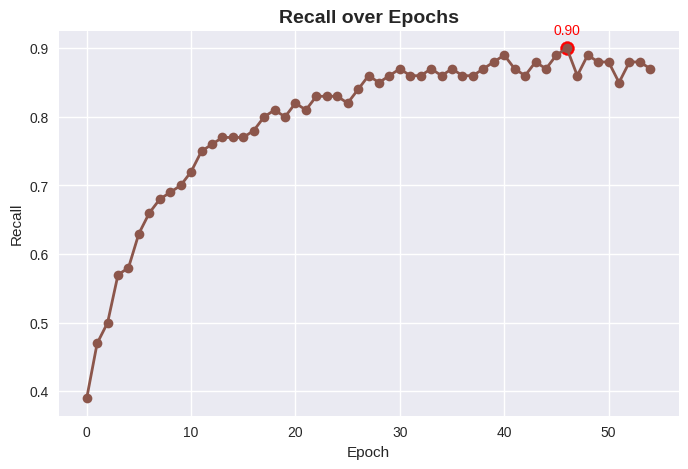

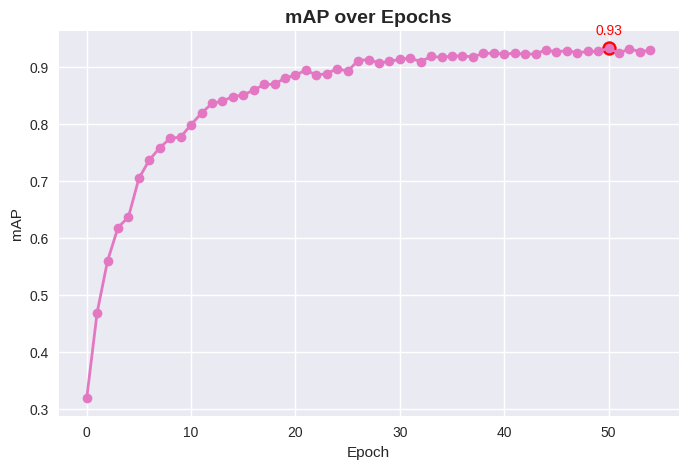

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

# Load CSV
csv_path = '/content/drive/MyDrive/Metrics_Over_epochs.csv'
df = pd.read_csv(csv_path)

colors = plt.cm.tab10.colors

# ---- 1. Training vs Validation Loss ----
plt.figure(figsize=(8,5))
plt.plot(df["Epoch"], df["Train Loss"], label="Training Loss",
         linewidth=2, marker="o", color=colors[0])
plt.plot(df["Epoch"], df["Validation Loss"], label="Validation Loss",
         linewidth=2, marker="s", color=colors[1])
best_val_loss_idx = df["Validation Loss"].idxmin()
plt.scatter(df["Epoch"][best_val_loss_idx], df["Validation Loss"][best_val_loss_idx],
            color="red", s=100, zorder=5, label="Best Val Loss")
plt.annotate(f"{df['Validation Loss'][best_val_loss_idx]:.3f}",
             (df["Epoch"][best_val_loss_idx], df["Validation Loss"][best_val_loss_idx]),
             textcoords="offset points", xytext=(0,-15), ha='center', color="red")
plt.title("Training vs Validation Loss", fontsize=14, fontweight="bold")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ---- 2. Training vs Validation Accuracy ----
plt.figure(figsize=(8,5))
plt.plot(df["Epoch"], df["Train Accuracy (%)"], label="Training Accuracy",
         linewidth=2, marker="o", color=colors[2])
plt.plot(df["Epoch"], df["Validation Accuracy (%)"], label="Validation Accuracy",
         linewidth=2, marker="s", color=colors[3])
best_val_acc_idx = df["Validation Accuracy (%)"].idxmax()
plt.scatter(df["Epoch"][best_val_acc_idx], df["Validation Accuracy (%)"][best_val_acc_idx],
            color="red", s=100, zorder=5, label="Best Val Acc")
plt.annotate(f"{df['Validation Accuracy (%)'][best_val_acc_idx]:.2f}%",
             (df["Epoch"][best_val_acc_idx], df["Validation Accuracy (%)"][best_val_acc_idx]),
             textcoords="offset points", xytext=(0,10), ha='center', color="red")
plt.title("Training vs Validation Accuracy", fontsize=14, fontweight="bold")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.show()

# ---- 3. Precision ----
plt.figure(figsize=(8,5))
plt.plot(df["Epoch"], df["Precision"], marker="o", linewidth=2, color=colors[4])
best_prec_idx = df["Precision"].idxmax()
plt.scatter(df["Epoch"][best_prec_idx], df["Precision"][best_prec_idx], color="red", s=100)
plt.annotate(f"{df['Precision'][best_prec_idx]:.2f}",
             (df["Epoch"][best_prec_idx], df["Precision"][best_prec_idx]),
             textcoords="offset points", xytext=(0,10), ha='center', color="red")
plt.title("Precision over Epochs", fontsize=14, fontweight="bold")
plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.grid(True)
plt.show()

# ---- 4. Recall ----
plt.figure(figsize=(8,5))
plt.plot(df["Epoch"], df["Recall"], marker="o", linewidth=2, color=colors[5])
best_recall_idx = df["Recall"].idxmax()
plt.scatter(df["Epoch"][best_recall_idx], df["Recall"][best_recall_idx], color="red", s=100)
plt.annotate(f"{df['Recall'][best_recall_idx]:.2f}",
             (df["Epoch"][best_recall_idx], df["Recall"][best_recall_idx]),
             textcoords="offset points", xytext=(0,10), ha='center', color="red")
plt.title("Recall over Epochs", fontsize=14, fontweight="bold")
plt.xlabel("Epoch")
plt.ylabel("Recall")
plt.grid(True)
plt.show()

# ---- 5. mAP ----
plt.figure(figsize=(8,5))
plt.plot(df["Epoch"], df["mAP"], marker="o", linewidth=2, color=colors[6])
best_map_idx = df["mAP"].idxmax()
plt.scatter(df["Epoch"][best_map_idx], df["mAP"][best_map_idx], color="red", s=100)
plt.annotate(f"{df['mAP'][best_map_idx]:.2f}",
             (df["Epoch"][best_map_idx], df["mAP"][best_map_idx]),
             textcoords="offset points", xytext=(0,10), ha='center', color="red")
plt.title("mAP over Epochs", fontsize=14, fontweight="bold")
plt.xlabel("Epoch")
plt.ylabel("mAP")
plt.grid(True)
plt.show()


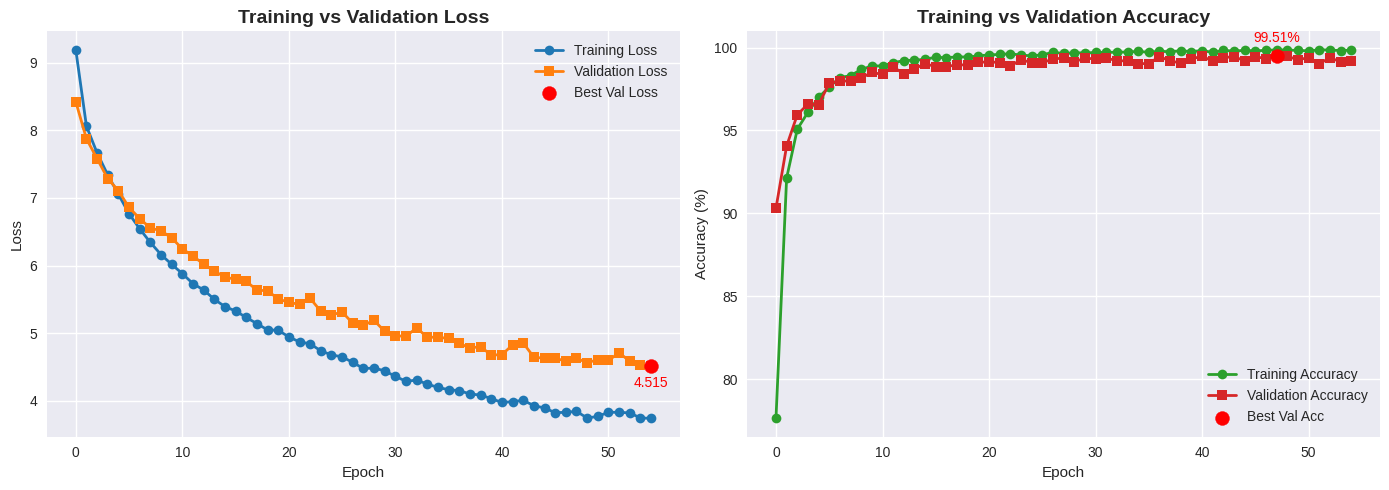

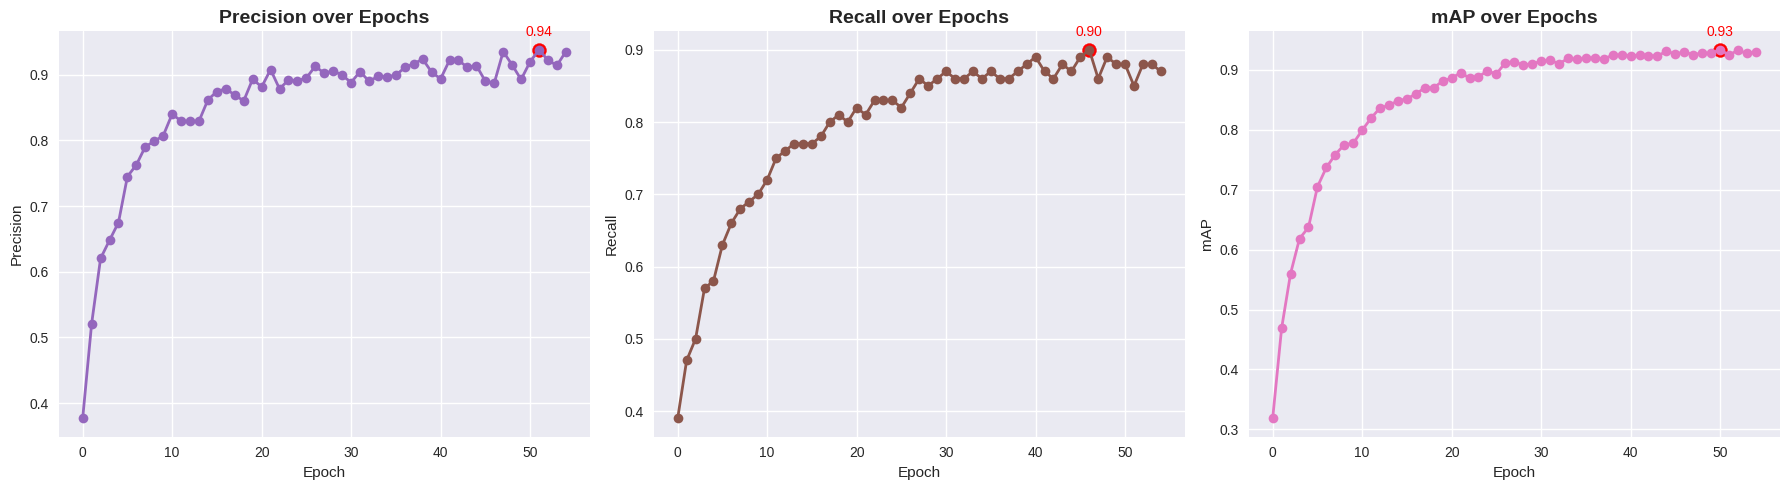

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

# Load CSV
csv_path = '/content/drive/MyDrive/Metrics_Over_epochs.csv'
df = pd.read_csv(csv_path)

colors = plt.cm.tab10.colors

# ---- IMAGE 1: Loss & Accuracy ----
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Loss
axs[0].plot(df["Epoch"], df["Train Loss"], label="Training Loss",
            linewidth=2, marker="o", color=colors[0])
axs[0].plot(df["Epoch"], df["Validation Loss"], label="Validation Loss",
            linewidth=2, marker="s", color=colors[1])
best_val_loss_idx = df["Validation Loss"].idxmin()
axs[0].scatter(df["Epoch"][best_val_loss_idx], df["Validation Loss"][best_val_loss_idx],
               color="red", s=100, zorder=5, label="Best Val Loss")
axs[0].annotate(f"{df['Validation Loss'][best_val_loss_idx]:.3f}",
                (df["Epoch"][best_val_loss_idx], df["Validation Loss"][best_val_loss_idx]),
                textcoords="offset points", xytext=(0,-15), ha='center', color="red")
axs[0].set_title("Training vs Validation Loss", fontsize=14, fontweight="bold")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()
axs[0].grid(True)

# Accuracy
axs[1].plot(df["Epoch"], df["Train Accuracy (%)"], label="Training Accuracy",
            linewidth=2, marker="o", color=colors[2])
axs[1].plot(df["Epoch"], df["Validation Accuracy (%)"], label="Validation Accuracy",
            linewidth=2, marker="s", color=colors[3])
best_val_acc_idx = df["Validation Accuracy (%)"].idxmax()
axs[1].scatter(df["Epoch"][best_val_acc_idx], df["Validation Accuracy (%)"][best_val_acc_idx],
               color="red", s=100, zorder=5, label="Best Val Acc")
axs[1].annotate(f"{df['Validation Accuracy (%)'][best_val_acc_idx]:.2f}%",
                (df["Epoch"][best_val_acc_idx], df["Validation Accuracy (%)"][best_val_acc_idx]),
                textcoords="offset points", xytext=(0,10), ha='center', color="red")
axs[1].set_title("Training vs Validation Accuracy", fontsize=14, fontweight="bold")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Accuracy (%)")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

# ---- IMAGE 2: Precision, Recall, mAP ----
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Precision
axs[0].plot(df["Epoch"], df["Precision"], marker="o", linewidth=2, color=colors[4])
best_prec_idx = df["Precision"].idxmax()
axs[0].scatter(df["Epoch"][best_prec_idx], df["Precision"][best_prec_idx], color="red", s=100)
axs[0].annotate(f"{df['Precision'][best_prec_idx]:.2f}",
                (df["Epoch"][best_prec_idx], df["Precision"][best_prec_idx]),
                textcoords="offset points", xytext=(0,10), ha='center', color="red")
axs[0].set_title("Precision over Epochs", fontsize=14, fontweight="bold")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Precision")
axs[0].grid(True)

# Recall
axs[1].plot(df["Epoch"], df["Recall"], marker="o", linewidth=2, color=colors[5])
best_recall_idx = df["Recall"].idxmax()
axs[1].scatter(df["Epoch"][best_recall_idx], df["Recall"][best_recall_idx], color="red", s=100)
axs[1].annotate(f"{df['Recall'][best_recall_idx]:.2f}",
                (df["Epoch"][best_recall_idx], df["Recall"][best_recall_idx]),
                textcoords="offset points", xytext=(0,10), ha='center', color="red")
axs[1].set_title("Recall over Epochs", fontsize=14, fontweight="bold")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Recall")
axs[1].grid(True)

# mAP
axs[2].plot(df["Epoch"], df["mAP"], marker="o", linewidth=2, color=colors[6])
best_map_idx = df["mAP"].idxmax()
axs[2].scatter(df["Epoch"][best_map_idx], df["mAP"][best_map_idx], color="red", s=100)
axs[2].annotate(f"{df['mAP'][best_map_idx]:.2f}",
                (df["Epoch"][best_map_idx], df["mAP"][best_map_idx]),
                textcoords="offset points", xytext=(0,10), ha='center', color="red")
axs[2].set_title("mAP over Epochs", fontsize=14, fontweight="bold")
axs[2].set_xlabel("Epoch")
axs[2].set_ylabel("mAP")
axs[2].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import json

output_dir = "/content/drive/MyDrive/checkpoints"
results_path = f"{output_dir}/results.json"

with open(results_path) as f:
    results = json.load(f)

class_data = results['class_map']['valid']  # use 'valid' or 'test' if available

for c in class_data:
    if c['class'] != 'all':
        precision = c['precision']
        recall = c['recall']
        f1 = 2 * (precision * recall) / (precision + recall)
        print(f"Class: {c['class']}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1-score: {f1:.3f}")


Class: dent, Precision: 0.958, Recall: 0.900, F1-score: 0.928
Class: hole, Precision: 0.892, Recall: 0.900, F1-score: 0.896
Class: rust, Precision: 0.930, Recall: 0.900, F1-score: 0.915


In [ ]:
!ls -la /content/output

total 1959704
drwxr-xr-x 3 root root      4096 Aug  6 13:34 .
drwxr-xr-x 1 root root      4096 Aug  6 13:17 ..
-rw-r--r-- 1 root root 535040506 Aug  6 13:34 checkpoint0009.pth
-rw-r--r-- 1 root root 401311829 Aug  6 13:34 checkpoint_best_ema.pth
-rw-r--r-- 1 root root 401320041 Aug  6 13:25 checkpoint_best_regular.pth
-rw-r--r-- 1 root root 133737350 Aug  6 13:34 checkpoint_best_total.pth
-rw-r--r-- 1 root root 535030322 Aug  6 13:34 checkpoint.pth
drwxr-xr-x 2 root root      4096 Aug  6 13:19 eval
-rw-r--r-- 1 root root      4412 Aug  6 13:34 events.out.tfevents.1754486237.14154fd71cd6.1731.0
-rw-r--r-- 1 root root     80406 Aug  6 13:34 log.txt
-rw-r--r-- 1 root root    157277 Aug  6 13:34 metrics_plot.png
-rw-r--r-- 1 root root      1651 Aug  6 13:34 results.json


## Deploy a Trained RF-DETR Model

Deploying to Roboflow allows you to create multi-step computer vision applications that run both in the cloud and your own hardware. Please wait a moment while Roboflow indexes your model.

In [ ]:
model.deploy_to_roboflow(
    workspace="Container Damage",
    project_id="container-damage-ithvn",
    version=1,
    api_key=os.environ["ROBOFLOW_API_KEY"]
)


loading Roboflow workspace...


RoboflowError: {
    "error": {
        "message": "Unsupported get request. Workspace with ID \"Container Damage\" does not exist or cannot be loaded due to missing permissions.",
        "status": 404,
        "type": "GraphMethodException",
        "hint": "You can see your available workspaces by issuing a GET request to /workspaces"
    }
}

## Evaluate Fine-tuned RF-DETR Model

Before benchmarking the model, we need to load the best saved checkpoint. To ensure it fits on the GPU, we first need to free up GPU memory. This involves deleting any remaining references to previously used objects, triggering Python’s garbage collector, and clearing the CUDA memory cache.

In [ ]:
import gc
import torch
import weakref

def cleanup_gpu_memory(obj=None, verbose: bool = False):

    if not torch.cuda.is_available():
        if verbose:
            print("[INFO] CUDA is not available. No GPU cleanup needed.")
        return

    def get_memory_stats():
        allocated = torch.cuda.memory_allocated()
        reserved = torch.cuda.memory_reserved()
        return allocated, reserved

    torch.cuda.synchronize()

    if verbose:
        alloc, reserv = get_memory_stats()
        print(f"[Before] Allocated: {alloc / 1024**2:.2f} MB | Reserved: {reserv / 1024**2:.2f} MB")

    # Ensure we drop all strong references
    if obj is not None:
        ref = weakref.ref(obj)
        del obj
        if ref() is not None and verbose:
            print("[WARNING] Object not fully garbage collected yet.")

    gc.collect()
    torch.cuda.empty_cache()
    torch.cuda.ipc_collect()

    torch.cuda.synchronize()

    if verbose:
        alloc, reserv = get_memory_stats()
        print(f"[After]  Allocated: {alloc / 1024**2:.2f} MB | Reserved: {reserv / 1024**2:.2f} MB")

In [ ]:
cleanup_gpu_memory(model, verbose=True)

[Before] Allocated: 138.88 MB | Reserved: 16940.00 MB
[WARNING] Object not fully garbage collected yet.
[After]  Allocated: 138.88 MB | Reserved: 260.00 MB


We load the best-performing model from the `checkpoint_best_total.pth` file using the `RFDETRMedium` class. This checkpoint contains the trained weights from our most successful training run. After loading, we call `optimize_for_inference()`, which prepares the model for efficient inference.

In [ ]:
model = RFDETRSmall(pretrain_weights="/content/drive/MyDrive/checkpoints/checkpoint_best_total.pth")
model.optimize_for_inference()

Using a different number of positional encodings than DINOv2, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Using patch size 16 instead of 14, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Loading pretrain weights


reinitializing detection head with 3 classes
`loss_type=None` was set in the config but it is unrecognized. Using the default loss: `ForCausalLMLoss`.


In [ ]:
import supervision as sv

ds = sv.DetectionDataset.from_coco(
    images_directory_path=f"{dataset.location}/test",
    annotations_path=f"{dataset.location}/test/_annotations.coco.json",
)

In [ ]:
import supervision as sv
from tqdm import tqdm
from supervision.metrics import MeanAveragePrecision

targets = []
predictions = []

for path, image, annotations in tqdm(ds):
    image = Image.open(path)
    detections = model.predict(image, threshold=0)

    targets.append(annotations)
    predictions.append(detections)

100%|██████████| 983/983 [00:20<00:00, 48.87it/s]


In [ ]:
map_metric = MeanAveragePrecision()
map_result = map_metric.update(predictions, targets).compute()
print(map_result)

Average Precision (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.636
Average Precision (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.916
Average Precision (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.717
Average Precision (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.376
Average Precision (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ]                 = 0.612
Average Precision (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ]                 = 0.739


## Run Inference with Fine-tuned RF-DETR Model

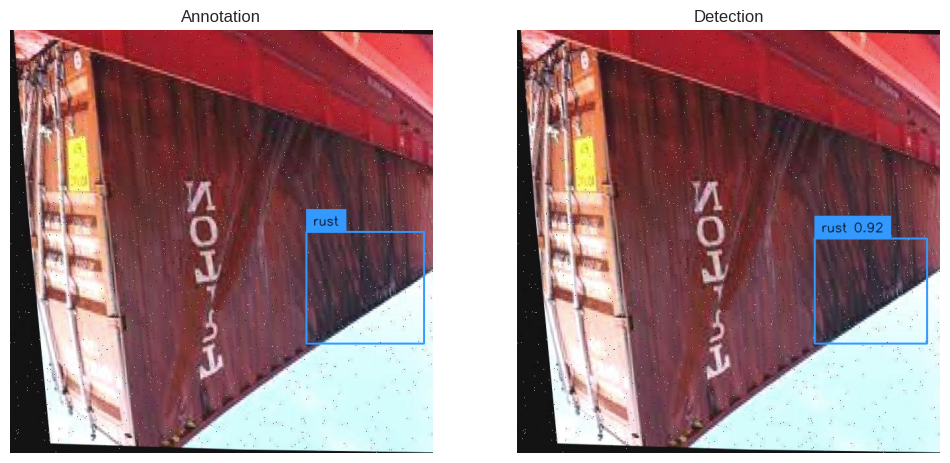

In [ ]:
from rfdetr import RFDETRSmall #after 45 epochs
import supervision as sv
from PIL import Image

path, image, annotations = ds[90]
image = Image.open(path)

detections = model.predict(image, threshold=0.5)

text_scale = sv.calculate_optimal_text_scale(resolution_wh=image.size)
thickness = sv.calculate_optimal_line_thickness(resolution_wh=image.size)
color = sv.ColorPalette.from_hex([
    "#ffff00", "#ff9b00", "#ff66ff", "#3399ff", "#ff66b2", "#ff8080",
    "#b266ff", "#9999ff", "#66ffff", "#33ff99", "#66ff66", "#99ff00"
])

bbox_annotator = sv.BoxAnnotator(color=color,thickness=thickness)
label_annotator = sv.LabelAnnotator(
    color=color,
    text_color=sv.Color.BLACK,
    text_scale=text_scale)

annotations_labels = [
    f"{ds.classes[class_id]}"
    for class_id
    in annotations.class_id
]

detections_labels = [
    f"{ds.classes[class_id]} {confidence:.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]

annotation_image = image.copy()
annotation_image = bbox_annotator.annotate(annotation_image, annotations)
annotation_image = label_annotator.annotate(annotation_image, annotations, annotations_labels)

detections_image = image.copy()
detections_image = bbox_annotator.annotate(detections_image, detections)
detections_image = label_annotator.annotate(detections_image, detections, detections_labels)

sv.plot_images_grid(images=[annotation_image, detections_image], grid_size=(1, 2), titles=["Annotation", "Detection"])

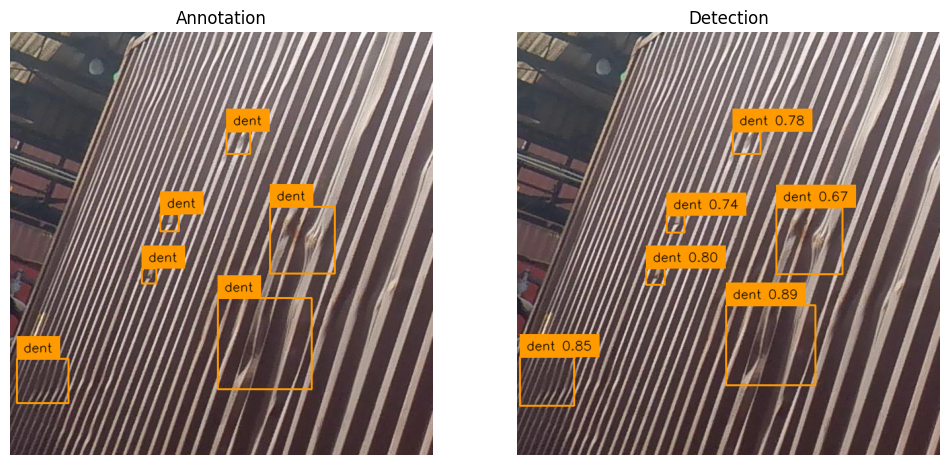

In [ ]:
from rfdetr import RFDETRSmall #after 40 epochs
import supervision as sv
from PIL import Image

path, image, annotations = ds[111]
image = Image.open(path)

detections = model.predict(image, threshold=0.5)

text_scale = sv.calculate_optimal_text_scale(resolution_wh=image.size)
thickness = sv.calculate_optimal_line_thickness(resolution_wh=image.size)
color = sv.ColorPalette.from_hex([
    "#ffff00", "#ff9b00", "#ff66ff", "#3399ff", "#ff66b2", "#ff8080",
    "#b266ff", "#9999ff", "#66ffff", "#33ff99", "#66ff66", "#99ff00"
])

bbox_annotator = sv.BoxAnnotator(color=color,thickness=thickness)
label_annotator = sv.LabelAnnotator(
    color=color,
    text_color=sv.Color.BLACK,
    text_scale=text_scale)

annotations_labels = [
    f"{ds.classes[class_id]}"
    for class_id
    in annotations.class_id
]

detections_labels = [
    f"{ds.classes[class_id]} {confidence:.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]

annotation_image = image.copy()
annotation_image = bbox_annotator.annotate(annotation_image, annotations)
annotation_image = label_annotator.annotate(annotation_image, annotations, annotations_labels)

detections_image = image.copy()
detections_image = bbox_annotator.annotate(detections_image, detections)
detections_image = label_annotator.annotate(detections_image, detections, detections_labels)

sv.plot_images_grid(images=[annotation_image, detections_image], grid_size=(1, 2), titles=["Annotation", "Detection"])

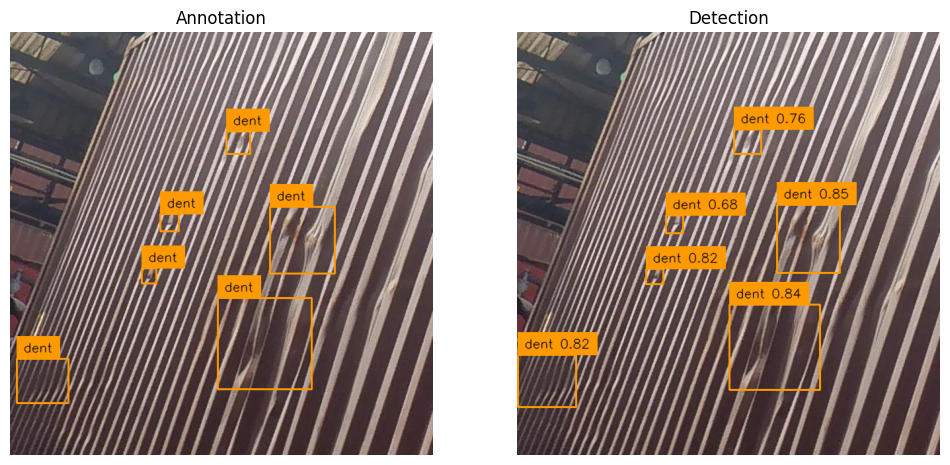

In [ ]:
from rfdetr import RFDETRBase #after 30 epochs
import supervision as sv
from PIL import Image

path, image, annotations = ds[111]
image = Image.open(path)

detections = model.predict(image, threshold=0.5)

text_scale = sv.calculate_optimal_text_scale(resolution_wh=image.size)
thickness = sv.calculate_optimal_line_thickness(resolution_wh=image.size)
color = sv.ColorPalette.from_hex([
    "#ffff00", "#ff9b00", "#ff66ff", "#3399ff", "#ff66b2", "#ff8080",
    "#b266ff", "#9999ff", "#66ffff", "#33ff99", "#66ff66", "#99ff00"
])

bbox_annotator = sv.BoxAnnotator(color=color,thickness=thickness)
label_annotator = sv.LabelAnnotator(
    color=color,
    text_color=sv.Color.BLACK,
    text_scale=text_scale)

annotations_labels = [
    f"{ds.classes[class_id]}"
    for class_id
    in annotations.class_id
]

detections_labels = [
    f"{ds.classes[class_id]} {confidence:.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]

annotation_image = image.copy()
annotation_image = bbox_annotator.annotate(annotation_image, annotations)
annotation_image = label_annotator.annotate(annotation_image, annotations, annotations_labels)

detections_image = image.copy()
detections_image = bbox_annotator.annotate(detections_image, detections)
detections_image = label_annotator.annotate(detections_image, detections, detections_labels)

sv.plot_images_grid(images=[annotation_image, detections_image], grid_size=(1, 2), titles=["Annotation", "Detection"])

In [ ]:
!pip install -q inference-gpu==0.51.7

<div align="center">
  <p>
    Looking for more tutorials or have questions?
    Check out our <a href="https://github.com/roboflow/notebooks">GitHub repo</a> for more notebooks,
    or visit our <a href="https://discord.gg/GbfgXGJ8Bk">discord</a>.
  </p>
  
  <p>
    <strong>If you found this helpful, please consider giving us a ⭐
    <a href="https://github.com/roboflow/notebooks">on GitHub</a>!</strong>
  </p>

</div>